In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import plot_tree
import math 

data=pd.read_csv('niftydata_5daylag_17797_.csv')
data.describe()



,nifty_close,lag1,lag2,lag3,lag4,lag5
count,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000
mean,6270.694294,6267.979182,6265.219352,6262.442660,6259.670518,6256.900318
std,4417.373167,4415.510634,4413.533057,4411.524439,4409.497576,4407.502149
min,854.200000,854.200000,854.200000,854.200000,854.200000,854.200000
25%,2367.850000,2367.800000,2367.750000,2361.550000,2361.200000,2360.150000
50%,5381.600000,5380.500000,5380.350000,5378.750000,5375.500000,5374.650000
75%,8786.200000,8780.350000,8779.850000,8778.400000,8778.300000,8778.000000
max,18477.050000,18477.050000,18477.050000,18477.050000,18477.050000,18477.050000


In [5]:
x = data[["lag1"]]
y = data["nifty_close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Intercept: ", regressor.intercept_)
print("Coefficients: ", regressor.coef_)
y_pred = regressor.predict(x_test)


Intercept:  3.39010591571423
Coefficients:  [0.99986021]


In [6]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))
     

MSE: 7933.58820378392
RMSE: 89.07069217079162
MAE: 55.93141540014356
Mean Absolute percentage error: 1.0170952510135016 %
R-2: 0.9996043020924946


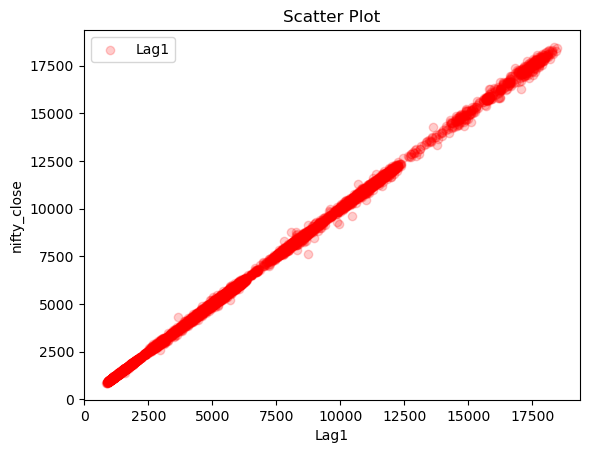

In [7]:
plt.scatter(x, y, color = "red", label = "Lag1", alpha=0.2)

plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Scatter Plot')
plt.legend()
plt.show()

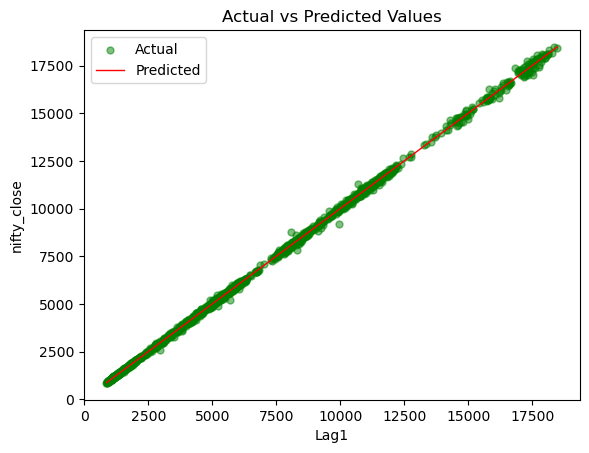

In [8]:
X_ref = Y_ref = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.scatter(x_test, y_test, color = "green", alpha = 0.5, s=25, label = "Actual")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [9]:

x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

lr = LinearRegression()
lr.fit(x_train, y_train)
print("Intercept: ", lr.intercept_)
print("Coefficients: ", lr.coef_)
y_pred = lr.predict(x_test)
     

Intercept:  1.9685356556119586
Coefficients:  [ 1.02782359 -0.02315938 -0.0347749   0.04496214 -0.01471684]


In [10]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 6404.826732694795
RMSE: 80.03016139365705
MAE: 51.105767518379864
Mean Absolute percentage error: 0.9838628631580826 %
R-2: 0.999663463381389


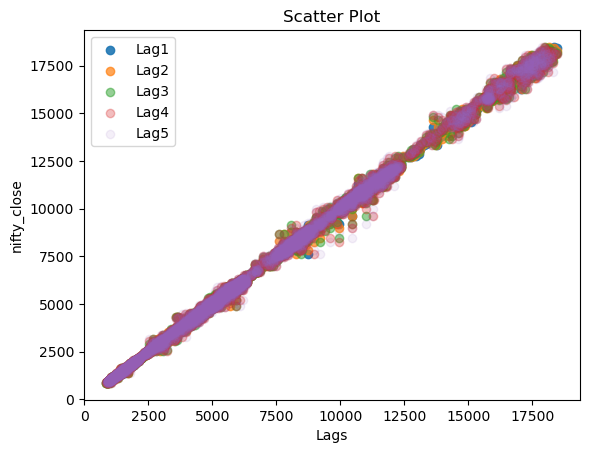

In [11]:
plt.scatter(x["lag1"], y, label = "Lag1", alpha=0.9)
plt.scatter(x["lag2"], y, label = "Lag2", alpha=0.7)
plt.scatter(x["lag3"], y, label = "Lag3", alpha=0.5)
plt.scatter(x["lag4"], y, label = "Lag4", alpha=0.3)
plt.scatter(x["lag5"], y, label = "Lag5", alpha=0.1)
plt.xlabel('Lags')
plt.ylabel('nifty_close')
plt.title('Scatter Plot')
plt.legend()
plt.show()
     

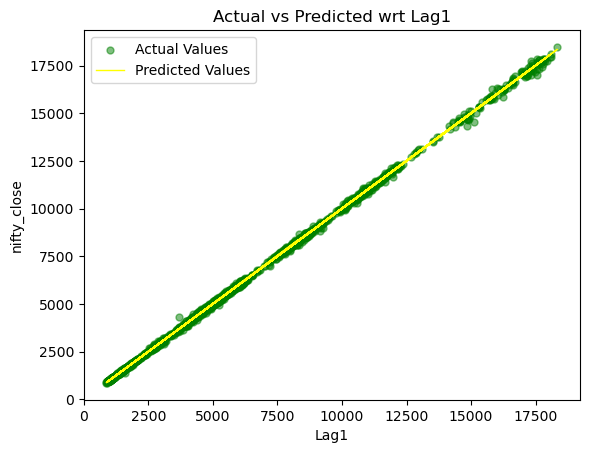

In [12]:
X_ref = Y_ref = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.scatter(x_test["lag1"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1')
plt.legend()
plt.show()
     

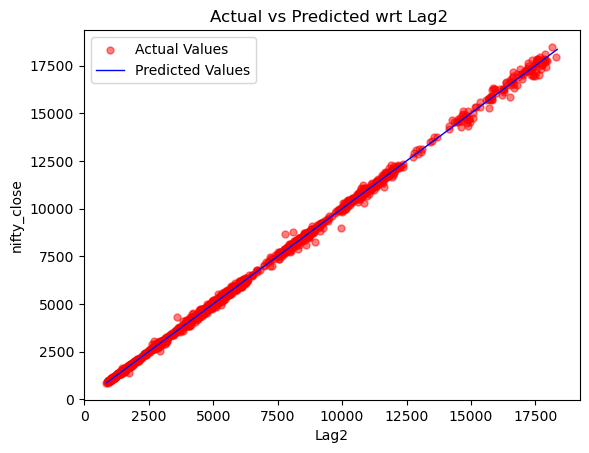

In [13]:
plt.scatter(x_test["lag2"], y_test, color = "red", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='blue', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

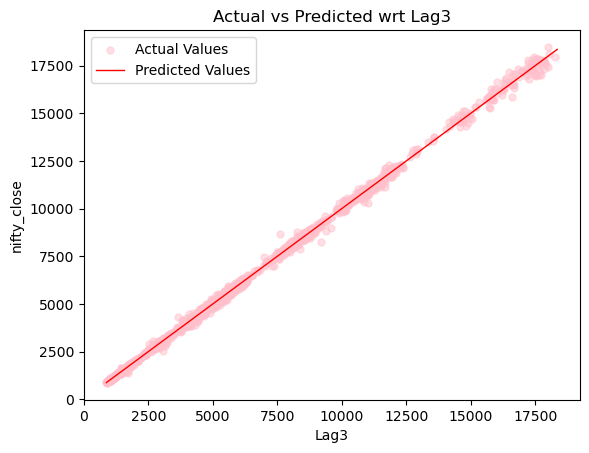

In [14]:
plt.scatter(x_test["lag3"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag3')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag3')
plt.legend()
plt.show()

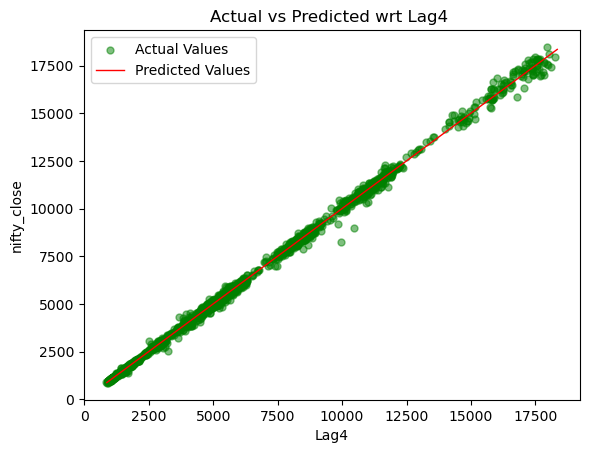

In [15]:

plt.scatter(x_test["lag4"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag4')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag4 ')
plt.legend()
plt.show()

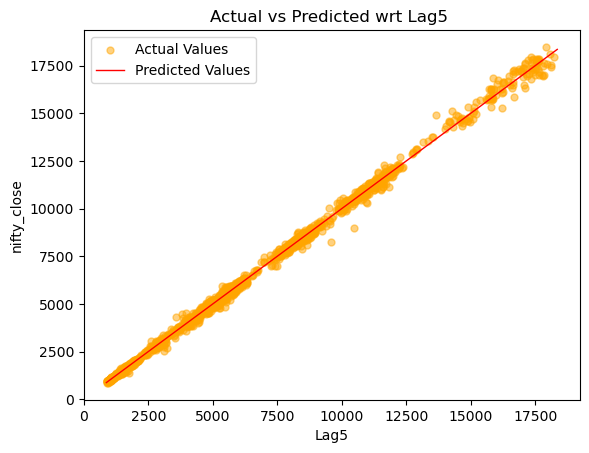

In [16]:
plt.scatter(x_test["lag5"], y_test, color = "orange", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(X_ref, Y_ref, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag5')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag5 ')
plt.legend()
plt.show()
     

In [17]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

print("test set Model performance : ", regressor.score(x_test, y_test))

test set Model performance :  0.9991540611896679


In [18]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 16634.510279576232
RMSE: 128.97484359198205
MAE: 80.61995291347853
Mean Absolute percentage error: 1.50699243855315 %
R-2: 0.9991540611896679


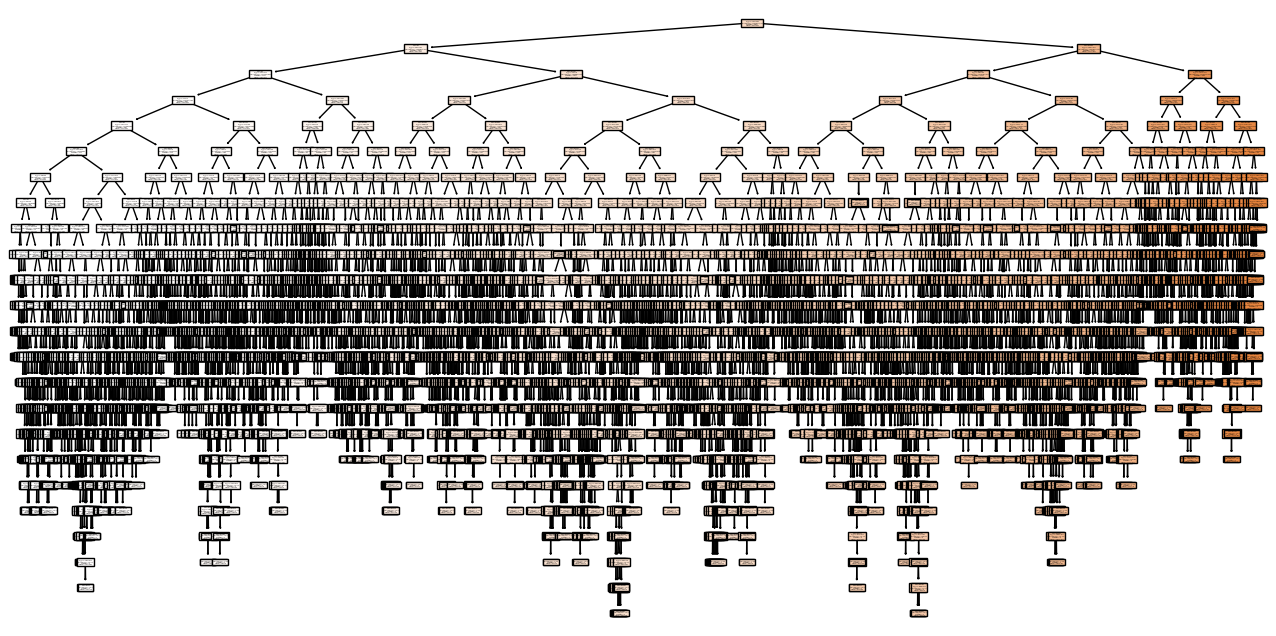

In [19]:
plt.figure(figsize=(16, 8))
plot_tree(regressor, filled=True, node_ids=True)
plt.show()

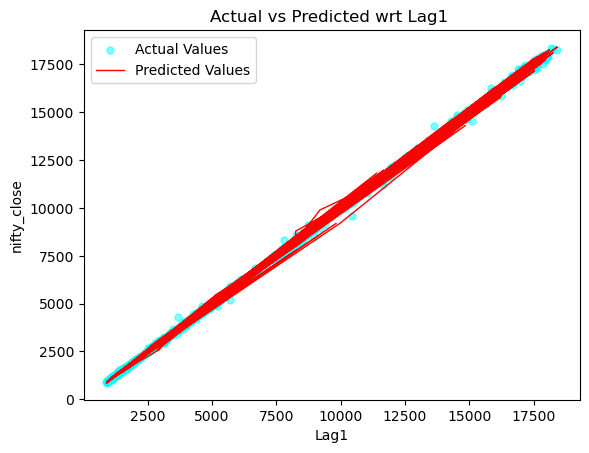

In [20]:
plt.scatter(x_test["lag1"], y_test, color = "cyan", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

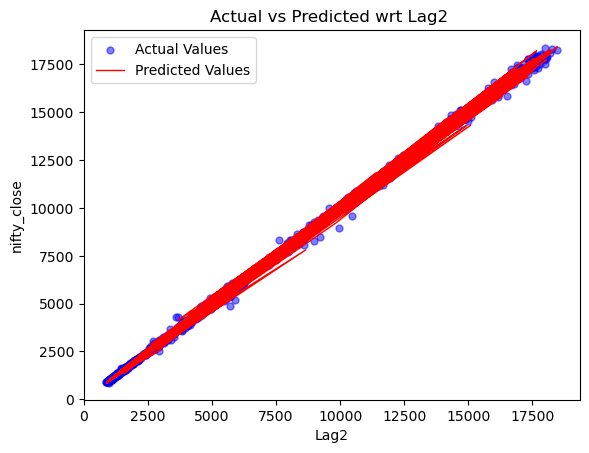

In [21]:
plt.scatter(x_test["lag2"], y_test, color = "blue", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

In [22]:
data['Class'] = np.where(data['nifty_close'] < 5000, "Very Low",
                       np.where(data['nifty_close'] < 10000, "Low",
                       np.where(data['nifty_close'] < 15000, "High",
                       "Very High")))
data

,Date,nifty_close,lag1,lag2,lag3,lag4,lag5,Class
0,10-01-2000 00:00,1632.95,1613.30,1617.60,1595.80,1638.70,1592.20,Very Low
1,11-01-2000 00:00,1572.50,1632.95,1613.30,1617.60,1595.80,1638.70,Very Low
2,12-01-2000 00:00,1624.80,1572.50,1632.95,1613.30,1617.60,1595.80,Very Low
3,13-01-2000 00:00,1621.40,1624.80,1572.50,1632.95,1613.30,1617.60,Very Low
4,14-01-2000 00:00,1622.75,1621.40,1624.80,1572.50,1632.95,1613.30,Very Low
...,...,...,...,...,...,...,...,...
5656,04-10-2022 00:00,17274.30,16887.35,17094.35,16818.10,16858.60,17007.40,Very High
5657,06-10-2022 00:00,17331.80,17274.30,16887.35,17094.35,16818.10,16858.60,Very High
5658,07-10-2022 00:00,17314.65,17331.80,17274.30,16887.35,17094.35,16818.10,Very High
5659,10-10-2022 00:00,17241.00,17314.65,17331.80,17274.30,16887.35,17094.35,Very High


In [23]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Training set score: ",model.score(x_train, y_train))
print("Test set score: ",model.score(x_test, y_test))

Training set score:  1.0
Test set score:  0.9829311359623308


In [24]:
acc = np.mean(y_test == y_pred)
precision, recall, f1,_ = precision_recall_fscore_support(y_test, y_pred)
print("Accuracy: ", acc)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Accuracy:  0.9829311359623308
Precision:  [0.98393574 0.9776     0.96396396 0.99019608]
Recall:  [0.97609562 0.98231511 1.         0.98331015]
F1 Score:  [0.98       0.97995188 0.98165138 0.9867411 ]


[Text(0.4375, 0.9545454545454546, 'lag2 <= 4985.75\ngini = 0.658\nsamples = 2505\nvalue = [573, 1423, 245, 1721]\nclass = Very High'),
 Text(0.14473684210526316, 0.8636363636363636, 'lag1 <= 4942.375\ngini = 0.017\nsamples = 1078\nvalue = [0, 15, 0, 1692]\nclass = Very High'),
 Text(0.07894736842105263, 0.7727272727272727, 'lag1 <= 4879.6\ngini = 0.002\nsamples = 1062\nvalue = [0, 2, 0, 1679]\nclass = Very High'),
 Text(0.05263157894736842, 0.6818181818181818, 'gini = 0.0\nsamples = 1046\nvalue = [0, 0, 0, 1661]\nclass = Very High'),
 Text(0.10526315789473684, 0.6818181818181818, 'lag4 <= 5094.425\ngini = 0.18\nsamples = 16\nvalue = [0, 2, 0, 18]\nclass = Very High'),
 Text(0.05263157894736842, 0.5909090909090909, 'lag1 <= 4884.875\ngini = 0.105\nsamples = 14\nvalue = [0, 1, 0, 17]\nclass = Very High'),
 Text(0.02631578947368421, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = Low'),
 Text(0.07894736842105263, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 0, 17]\nclass = 

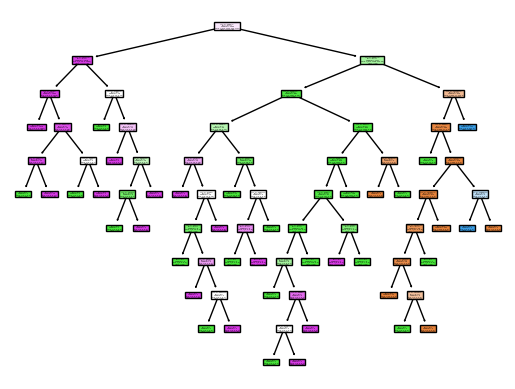

In [25]:
plot_tree(model.estimators_[0], filled=True, feature_names=['lag1', 'lag2', 'lag3', 'lag4', 'lag5'], class_names=['Very Low','Low','High','Very High'])
     

In [26]:

x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

ridge = Ridge().fit(x_train, y_train)

y_pred = ridge.predict(x_test)

print("Intercept: ", ridge.intercept_)
print("Coefficients: ", ridge.coef_)
print("Training set score: ",ridge.score(x_train, y_train))
print("Test set score: ",ridge.score(x_test, y_test))

Intercept:  2.68033252823534
Coefficients:  [ 1.03660404 -0.01920295 -0.00403522  0.0345142  -0.04807044]
Training set score:  0.9995915903729647
Test set score:  0.9996538014690964


In [27]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 6624.038212599114
RMSE: 81.38819455301312
MAE: 51.182034123131224
Mean Absolute percentage error: 0.9207211007119189 %
R-2: 0.9996538014690964


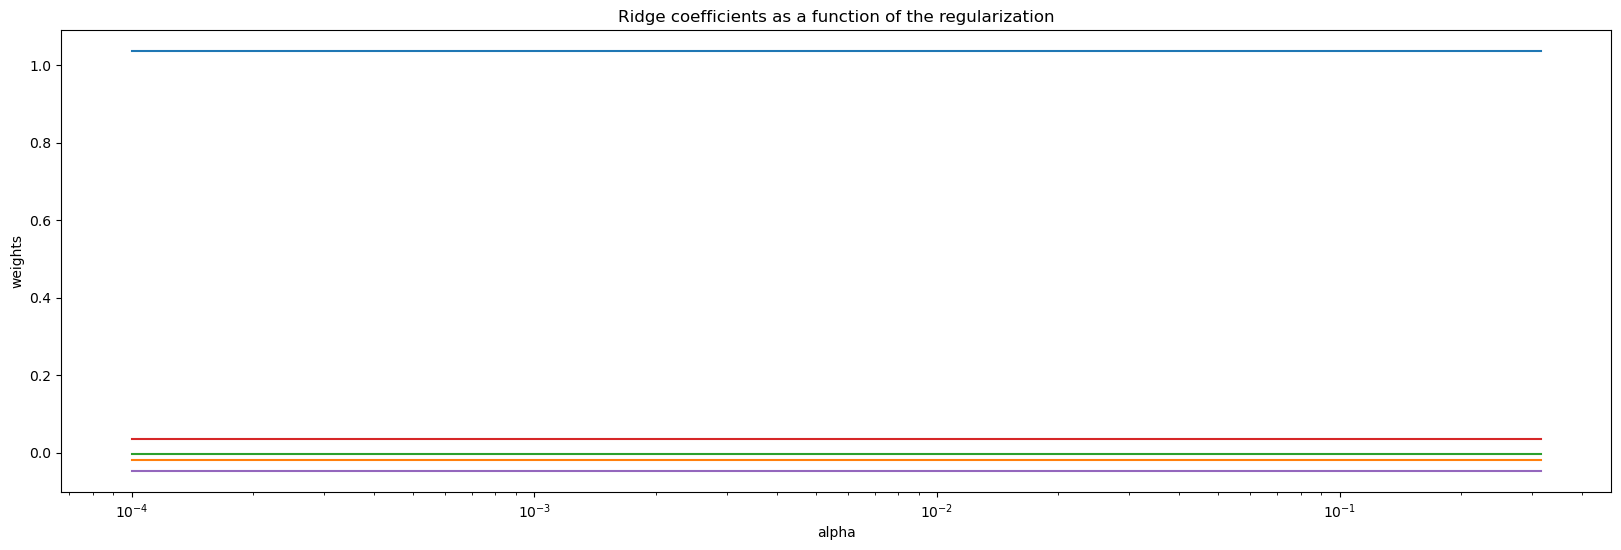

In [28]:
alphas = np.logspace(-4, -0.5, 30)
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(20, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
     

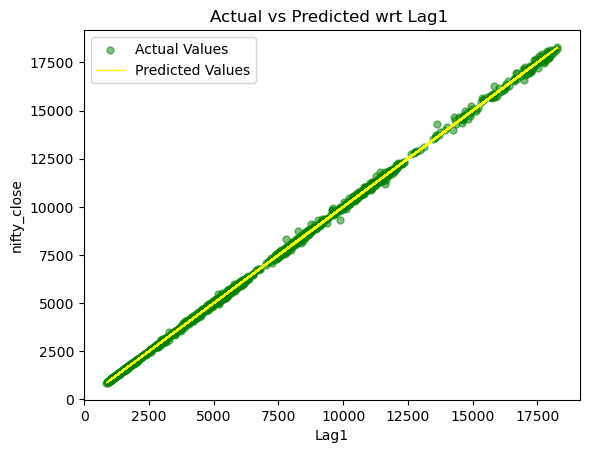

In [29]:
plt.scatter(x_test["lag1"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

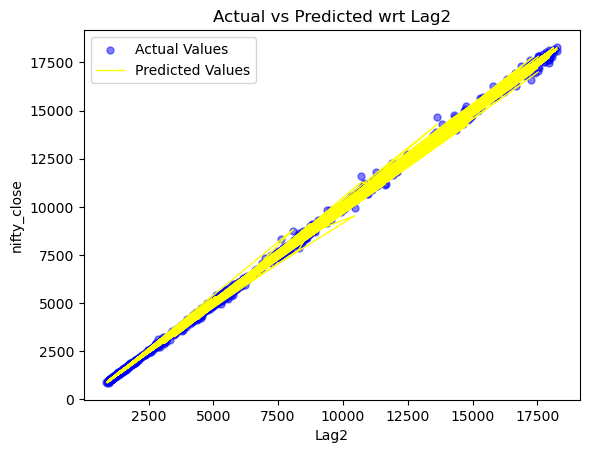

In [30]:
plt.scatter(x_test["lag2"], y_test, color = "blue", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2')
plt.legend()
plt.show()
     

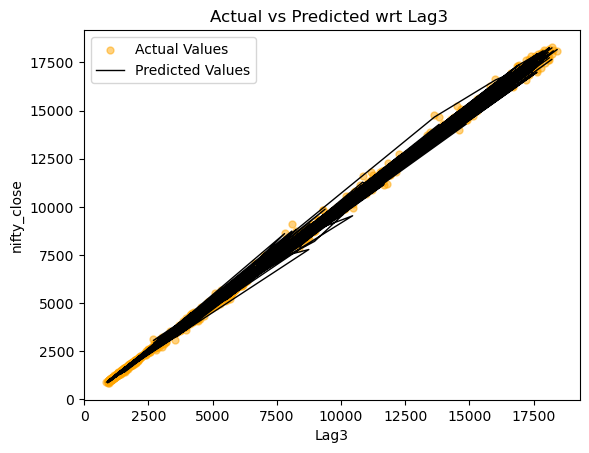

In [31]:
plt.scatter(x_test["lag3"], y_test, color = "orange", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag3"], y_pred, color='black', linewidth=1, label="Predicted Values")
plt.xlabel('Lag3')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag3 ')
plt.legend()
plt.show()

In [32]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = SVR()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Intercept: ", model.intercept_)
print("Training set score: ",model.score(x_train, y_train))
print("Test set score: ",model.score(x_test, y_test))
     

Intercept:  [5674.42703132]
Training set score:  0.27801813197477077
Test set score:  0.26677844872020884


In [33]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))

MSE: 14150406.712340765
RMSE: 3761.7026347574
MAE: 2620.5522829185998
Mean Absolute percentage error: 73.8783387012972 %
R-2: 0.26677844872020884


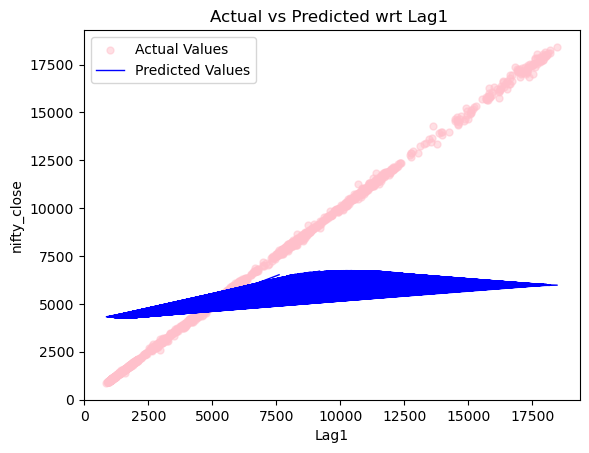

In [34]:
plt.scatter(x_test["lag1"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='blue', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()

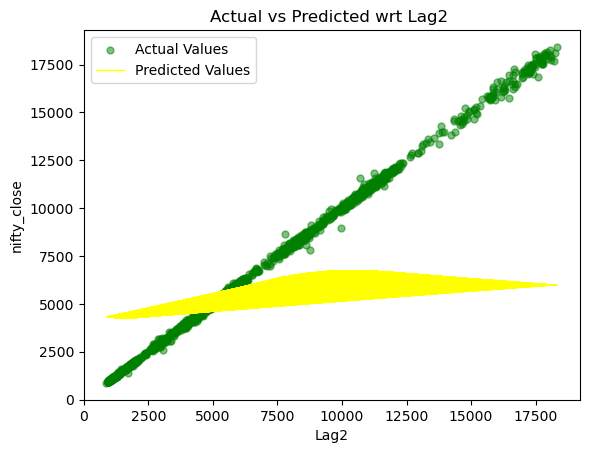

In [35]:
plt.scatter(x_test["lag2"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='yellow', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()

In [36]:
x = data[["lag1","lag2","lag3","lag4","lag5"]]
y = data["nifty_close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

mknn = KNeighborsRegressor(n_neighbors=5)
mknn.fit(x_train, y_train)

y_pred = mknn.predict(x_test)
print("Training set score: ",mknn.score(x_train, y_train))
print("Test set score: ",mknn.score(x_test, y_test))

Training set score:  0.9996311052424774
Test set score:  0.9994163532233007


In [37]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Mean Absolute percentage error:",mean_absolute_percentage_error(y_test, y_pred) * 100,"%")
print("R-2:", r2_score(y_test, y_pred))
     

MSE: 11079.07292130665
RMSE: 105.25717515355734
MAE: 63.355697469099454
Mean Absolute percentage error: 1.1864259771621268 %
R-2: 0.9994163532233007


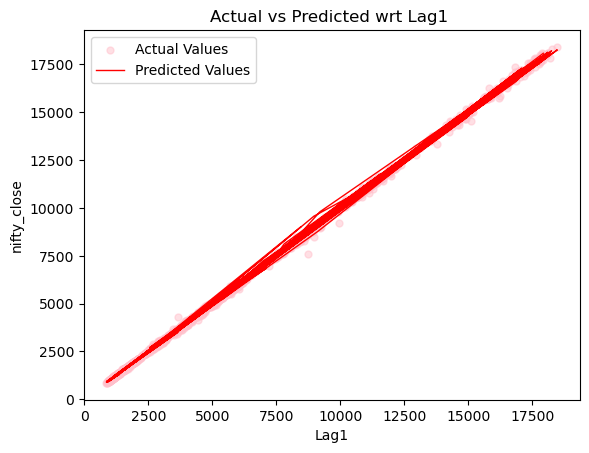

In [38]:

plt.scatter(x_test["lag1"], y_test, color = "pink", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag1"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag1')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag1 ')
plt.legend()
plt.show()
     

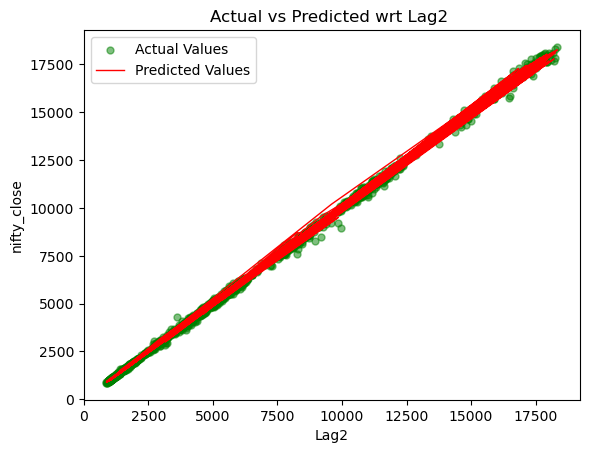

In [39]:
plt.scatter(x_test["lag2"], y_test, color = "green", alpha = 0.5, s=25, label = "Actual Values")
plt.plot(x_test["lag2"], y_pred, color='red', linewidth=1, label="Predicted Values")
plt.xlabel('Lag2')
plt.ylabel('nifty_close')
plt.title('Actual vs Predicted wrt Lag2 ')
plt.legend()
plt.show()
     